In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

This notebook can produce a prediction file for the data of the test set for the six different methods that were required. The cross validation of the hyperparameters of the least square with normal equations and logistic regression can be done at the end of the file.

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from helpers import *
from implementations import *
from cleaning_data import *
from cross_validation import *

In [4]:
DATA_TRAIN_PATH = 'train.csv'
DATA_TEST_PATH = 'test.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

##  Model:

To choose the model you will have to do the three essential following tasks: 

   1) Choose the type of regression: least squares or logistic regression.(To do so put a # in front of the unwanted choice and remove it in front of the wanted choice in the next cell)  
   
   2) Choose the parameters of the chosen method
   
   3) Choose the method. (To do so put a # in front of the unwanted choice and remove it in front of the wanted choice in the second next cell)
   
   4) Be sure to have train.csv and test.csv in the same folder as this file

The run.py file and this notebook output with least_squares(y,x) and degree=9 are the same. Be sure to run the cells from the top to the bottom to produce the output file with the name OUTPUT_PATH.

In [18]:
#Choice of regression------------------------------------------------------------------------------------------

#choice='least squares'
choice='logistic regression'

#Choice of parameters------------------------------------------------------------------------------------------

degree=9                       #choice of the degree of the polynomial expansion
max_iters=50                   #max number of iterations for GD and SGD
gamma=0.0015                   #step size for GD and SGD
lambda_=0.001                  #factor of the regularization for the ridge and logistic regression
OUTPUT_PATH='submission.csv'   #name of the output file

In [19]:
#Cleaning and adapting the data---------------------------------------------------------------------------------

x_0,x_1,x_23=adapt_x(tX,degree)
if choice=='least squares':
    y_0,y_1,y_23=adapt_y_least_squares(y,tX)
elif choice=='logistic regression':
    y_0,y_1,y_23=adapt_y_logistic(y,tX)
else:
    raise SyntaxWarning

#Computing the weights and loss on the training set-------------------------------------------------------------

#Gradient descent
#w_0, loss_w0 = least_squares_SGD(y_0, x_0, np.zeros(x_0.shape[1]), max_iters,gamma)
#w_1, loss_w1 = least_squares_SGD(y_1, x_1, np.zeros(x_1.shape[1]), max_iters,gamma)
#w_23, loss_w2 = least_squares_SGD(y_23, x_23, np.zeros(x_23.shape[1]), max_iters,gamma)

#Stochastic gradient descent
#w_0, loss_w0 = least_squares_SGD(y_0, x_0, np.zeros(x_0.shape[1]), max_iters,gamma)
#w_1, loss_w1 = least_squares_SGD(y_1, x_1, np.zeros(x_1.shape[1]), max_iters,gamma)
#w_23, loss_w2 = least_squares_SGD(y_23, x_23, np.zeros(x_23.shape[1]), max_iters,gamma)

#Least squares with normal equations
w_0, loss_w0 = least_squares(y_0, x_0)
w_1, loss_w1 = least_squares(y_1, x_1)
w_23, loss_w2 = least_squares(y_23, x_23)

#Ridge regression
#w_0, loss_w0 = ridge_regression(y_0, x_0, lambda_)
#w_1, loss_w1 = ridge_regression(y_1, x_1, lambda_)
#w_23, loss_w2 = ridge_regression(y_23, x_23, lambda_)

#Logistic regression
#w_0, loss_w0 = logistic_regression(y_0, x_0, np.zeros(x_0.shape[1]), max_iters,gamma)
#w_1, loss_w1 = logistic_regression(y_1, x_1, np.zeros(x_1.shape[1]), max_iters,gamma)
#w_23, loss_w2 = logistic_regression(y_23, x_23, np.zeros(x_23.shape[1]), max_iters,gamma)

#Regularized logistic regression
#w_0, loss_w0 = reg_logistic_regression(y_0, x_0, lambda_, np.zeros(x_0.shape[1]), max_iters,gamma)
#w_1, loss_w1 = reg_logistic_regression(y_1, x_1, lambda_, np.zeros(x_1.shape[1]), max_iters,gamma)
#w_23, loss_w2 = reg_logistic_regression(y_23, x_23, lambda_, np.zeros(x_23.shape[1]), max_iters,gamma)

#Predict on the train set----------------------------------------------------------------------------------------

y_pred_tr = label(w_0,w_1,w_23,x_0,x_1,x_23,tX,choice)
compute_accuracy(y, y_pred_tr)

0.826704

##  Create the submission file:

In [12]:
#Cleaning and adapting the data----------------------------------------------------------------------------------
x_0_te,x_1_te,x_23_te=adapt_x(tX_test,degree)

#Predict on the test set-----------------------------------------------------------------------------------------
y_pred_te=label(w_0,w_1,w_23,x_0_te,x_1_te,x_23_te,tX_test,choice)
create_csv_submission(ids_test, y_pred_te, OUTPUT_PATH)

## Cross validation:

The cross validation of the hyperparameters has been explicitely coded only for the least square with normal equations and the logistic regression. However the code can be easily adapted to the others method only by changing the name of the method in the cross_validation.py file. For one parameter validation, please modify the function cross_val_LS and for two parameters validation please modify the function cross_val_Log.

Every cross validation will be done with 5 folds.

The cross_val_LS takes the raw data and the maximum degree of the polynomial extension you want to test as input. The output is a boxplot of the accuracy on each fold for each degree from 1 to max_degree.

The cross_val_Log takes the raw data, the maximum degree of the polynomial extension you want to test and the different gamma you want to test (as an array) as input. The output  is a max_degree\*len(gamma)\*2 array where the element [d,i,0] is the mean of the accuracy on the k folds for degree d and gamma gamma[i] and [d,i,1] is the std of the accuracy on the k folds for degree d and gamma[i]. Keep in mind that this method is quite slow.

In both case, the choice of the hyperparameters has to be done with a grid search on the output or by manually check the result.

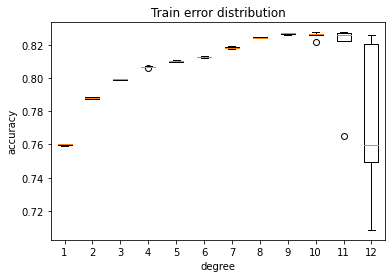

In [5]:
#Cross validation for the least square method
max_degree=12
k_fold=5
cross_val_LS(y,tX,k_fold,max_degree)

In [5]:
#Cross validation for the logistic regression method
#Second warning: this method can take a lot of time
max_degree=3
k_fold=5
gamma=np.logspace(-6,-1,12)
print(cross_val_Log(y,tX,k_fold,max_degree,gamma))

/Users/raphaelmirallie/Documents/EPFL/aMA_1/Machine_learning/ML_Project1/Projet/scripts/helper_implementations.py:38: RuntimeWarning: divide by zero encountered in log
  loss=y.T.dot(np.log(pred)) + (1-y).T.dot(np.log(1-pred))
/Users/raphaelmirallie/Documents/EPFL/aMA_1/Machine_learning/ML_Project1/Projet/scripts/implementations.py:51: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < treshold:
/Users/raphaelmirallie/Documents/EPFL/aMA_1/Machine_learning/ML_Project1/Projet/scripts/helper_implementations.py:33: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-t))


[[[7.16643000e-01 5.73293991e-04]
  [7.25841000e-01 3.54815445e-04]
  [7.31998000e-01 2.12758079e-04]
  [7.34477000e-01 2.33293806e-04]
  [7.35289000e-01 2.73667682e-04]
  [7.35703000e-01 2.70492144e-04]
  [7.35799000e-01 2.82549111e-04]
  [7.35831000e-01 2.70285035e-04]
  [7.35839000e-01 2.70580857e-04]
  [7.35838000e-01 2.74492259e-04]
  [7.35841000e-01 2.75778897e-04]
  [7.35843000e-01 2.76398263e-04]]

 [[6.65272000e-01 3.96693837e-04]
  [6.66586000e-01 3.83567465e-04]
  [6.67030000e-01 3.80013158e-04]
  [6.67142000e-01 3.70602213e-04]
  [6.67168000e-01 3.68274354e-04]
  [6.67176000e-01 3.71784884e-04]
  [6.67180000e-01 3.66510573e-04]
  [6.67183000e-01 3.67023160e-04]
  [6.67184000e-01 3.65162977e-04]
  [6.67184000e-01 3.65162977e-04]
  [6.67184000e-01 3.65162977e-04]
  [6.67184000e-01 3.65162977e-04]]

 [[6.43788000e-01 2.37994664e-03]
  [6.43507000e-01 2.42760911e-03]
  [6.43539000e-01 2.48056123e-03]
  [6.43548000e-01 2.49802442e-03]
  [6.43544000e-01 2.49737342e-03]
  [6.43544

In [6]:
print(np.logspace(-6,-1,12))


[1.00000000e-06 2.84803587e-06 8.11130831e-06 2.31012970e-05
 6.57933225e-05 1.87381742e-04 5.33669923e-04 1.51991108e-03
 4.32876128e-03 1.23284674e-02 3.51119173e-02 1.00000000e-01]
